# Load and Preprocess the data

In [ ]:
# Import th MNIST Dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


## Normalize the Data

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
tf.reduce_max(x_train) # Returns maximum pixel value of all image

<tf.Tensor: shape=(), dtype=uint8, numpy=255>

In [ ]:
x_train, x_test = x_train/255, x_test/255

In [ ]:
tf.reduce_max(x_train)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

## Visualize the Data

(-0.5, 27.5, 27.5, -0.5)

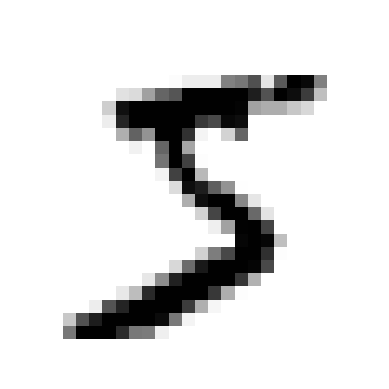

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="binary")
plt.axis(False)

# Building Models

### A non-CNN but feasable model on MNIST

In [ ]:
# set the seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1394 - accuracy: 0.6035 - val_loss: 0.8196 - val_accuracy: 0.7470
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7950 - accuracy: 0.7513 - val_loss: 0.7675 - val_accuracy: 0.7608
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7415 - accuracy: 0.7718 - val_loss: 0.7274 - val_accuracy: 0.7833
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7097 - accuracy: 0.7865 - val_loss: 0.7133 - val_accuracy: 0.7813
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6874 - accuracy: 0.7950 - val_loss: 0.6965 - val_accuracy: 0.7902
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6718 - accuracy: 0.7996 - val_loss: 0.6869 - val_accuracy: 0.7935
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6600 - accuracy: 0.8033 - val_loss: 0.6960 - val_accuracy:

In [ ]:
pred_probs = model_1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
preds = pred_probs.argmax(axis=1)

In [ ]:
preds[:10], y_test[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [ ]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 4)                 3140      
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## A CNN model

In [ ]:
# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(10, 3, activation="relu", input_shape=(28, 28)),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiel the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2 = model_2.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 21s 4ms/step - loss: 0.4142 - accuracy: 0.8740 - val_loss: 0.2017 - val_accuracy: 0.9394
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1859 - accuracy: 0.9452 - val_loss: 0.1448 - val_accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1451 - accuracy: 0.9578 - val_loss: 0.1160 - val_accuracy: 0.9643
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1222 - accuracy: 0.9639 - val_loss: 0.1062 - val_accuracy: 0.9680
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9684 - val_loss: 0.0957 - val_accuracy: 0.9701


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 10)            850       
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 10)            310       
                                                                 
 conv1d_2 (Conv1D)           (None, 22, 10)            310       
                                                                 
 flatten_8 (Flatten)         (None, 220)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2210      
                                                                 
Total params: 3,680
Trainable params: 3,680
Non-trainable params: 0
_________________________________________________________________



A new model with maxpool layers

In [ ]:
# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(10, 3, activation="relu", input_shape=(28, 28)),
    tf.keras.layers.MaxPool1D(),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiel the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3 = model_3.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4350 - accuracy: 0.8659 - val_loss: 0.2069 - val_accuracy: 0.9404
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1874 - accuracy: 0.9437 - val_loss: 0.1471 - val_accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1452 - accuracy: 0.9564 - val_loss: 0.1126 - val_accuracy: 0.9643
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1209 - accuracy: 0.9628 - val_loss: 0.1004 - val_accuracy: 0.9692
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1059 - accuracy: 0.9675 - val_loss: 0.0899 - val_accuracy: 0.9704


In [ ]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 26, 10)            850       
                                                                 
 conv1d_7 (Conv1D)           (None, 24, 10)            310       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 10)           0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 10, 10)            310       
                                                                 
 flatten_11 (Flatten)        (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                     